#Japan Used Cars Price Prediction

##Problem Statement:
Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.

### This dataset includes 10 features:  
1. Price (Integer) -----> The sale price of the vehicle in the ad
2. Mark (String) -----> The brand of car
3. Model (String) -----> Model of the vehicle
4. Year (Integer) -----> The vehicle registration year
5. Mileage (Integer) -----> Miles traveled by vehicle
6. Engine_capacity (Integer) -----> The measurement of the total volume of the cylinders in the engine
7. Transmission (String) -----> The type of gearbox used by the car
8. Drive (String) -----> Wheel drive (2wd, 4wd and awd)
9. Hand_drive (String) -----> Left-hand traffic (LHT) and right-hand traffic (RHT)
10. Fuel (String) -----> The type of fuel used by the car( gasoline, diesel, hybrid, lpg and cng)

####Predict the price of an unknown car.
##Importing Necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings('ignore')

###Download and Import the CSV Data as Pandas DataFrame

In [10]:
df = pd.read_csv('/content/Japan_used_cars_datasets.csv')

####Showing first 5 values

In [11]:
display(df.head())

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


##Data Cleaning
####Reindexing the columns

In [12]:
df= df.reindex(columns=['id', 'mark', 'model', 'year', 'mileage', 'engine_capacity', 'transmission', 'drive', 'hand_drive', 'fuel','price'])

In [13]:
df.head()

,id,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,price
0,0,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,80
1,1,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,110
2,2,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,165
3,3,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,190
4,4,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,190


####Removing Irrelevant Columns

In [14]:
df.drop('id',axis=1,inplace=True)

In [15]:
df.head()

,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,price
0,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,80
1,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,110
2,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,165
3,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,190
4,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,190


####Shape of the dataset

In [16]:
df.shape

(2318, 10)

####Display of Columns

In [17]:
df.columns

Index(['mark', 'model', 'year', 'mileage', 'engine_capacity', 'transmission',
       'drive', 'hand_drive', 'fuel', 'price'],
      dtype='object')

####Summary of the dataset

In [18]:
df.describe()

,year,mileage,engine_capacity,price
count,2318.000000,2318.000000,2318.000000,2318.000000
mean,2005.972390,100013.194996,1507.010785,971.522433
std,3.698863,52512.478883,549.585170,288.673112
min,1979.000000,2000.000000,9.000000,80.000000
25%,2004.000000,67000.000000,1300.000000,776.000000
50%,2006.000000,94000.000000,1490.000000,1000.000000
75%,2009.000000,124000.000000,1800.000000,1213.000000
max,2015.000000,790000.000000,12340.000000,1400.000000


####Check Datatypes in the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mark             2318 non-null   object
 1   model            2318 non-null   object
 2   year             2318 non-null   int64 
 3   mileage          2318 non-null   int64 
 4   engine_capacity  2318 non-null   int64 
 5   transmission     2318 non-null   object
 6   drive            2318 non-null   object
 7   hand_drive       2318 non-null   object
 8   fuel             2318 non-null   object
 9   price            2318 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 181.2+ KB


####Checking for Null Values

In [20]:
df.isnull().sum()

,0
mark,0
model,0
year,0
mileage,0
engine_capacity,0
transmission,0
drive,0
hand_drive,0
fuel,0
price,0


No null values are present in the dataset
####Checking for Duplicated Values

In [21]:
df.duplicated().sum()

0

#Data Visualization
## Pair Plot of Features

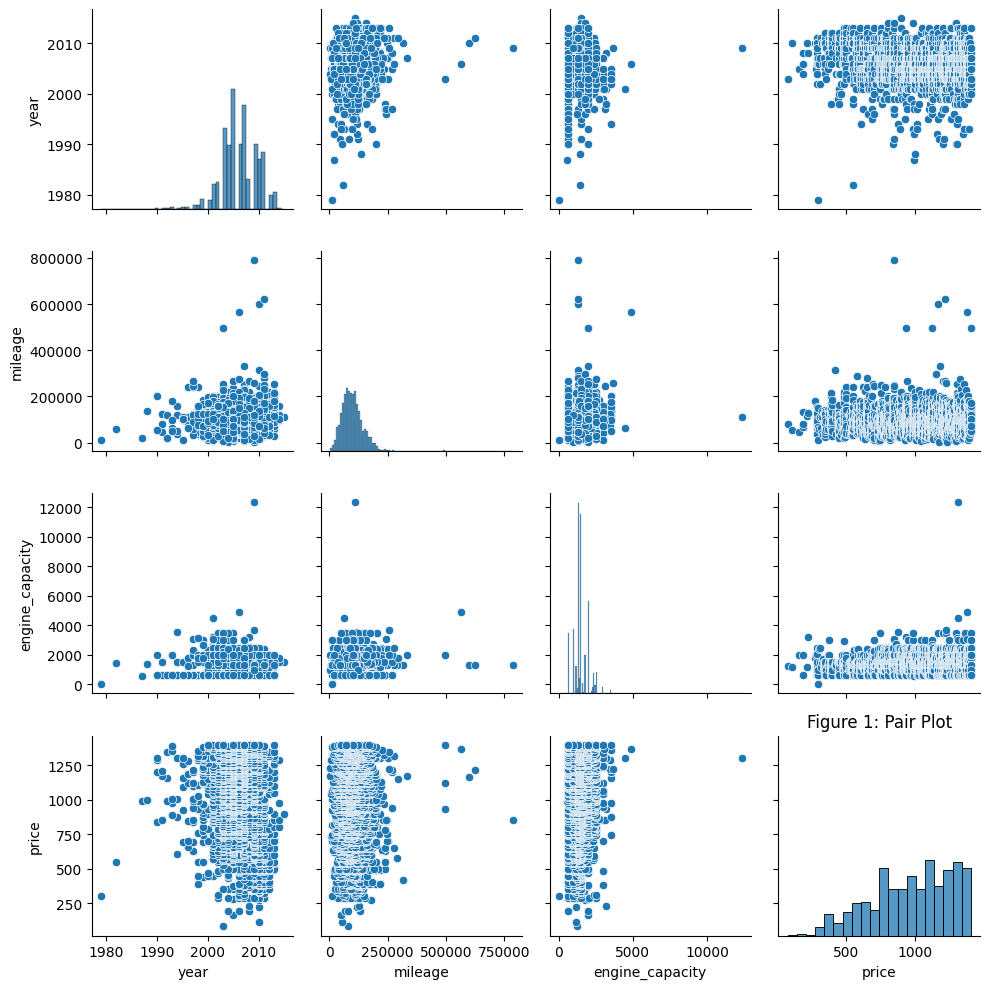

In [22]:
sns.pairplot(df)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.show()

##Visualize the Target Feature

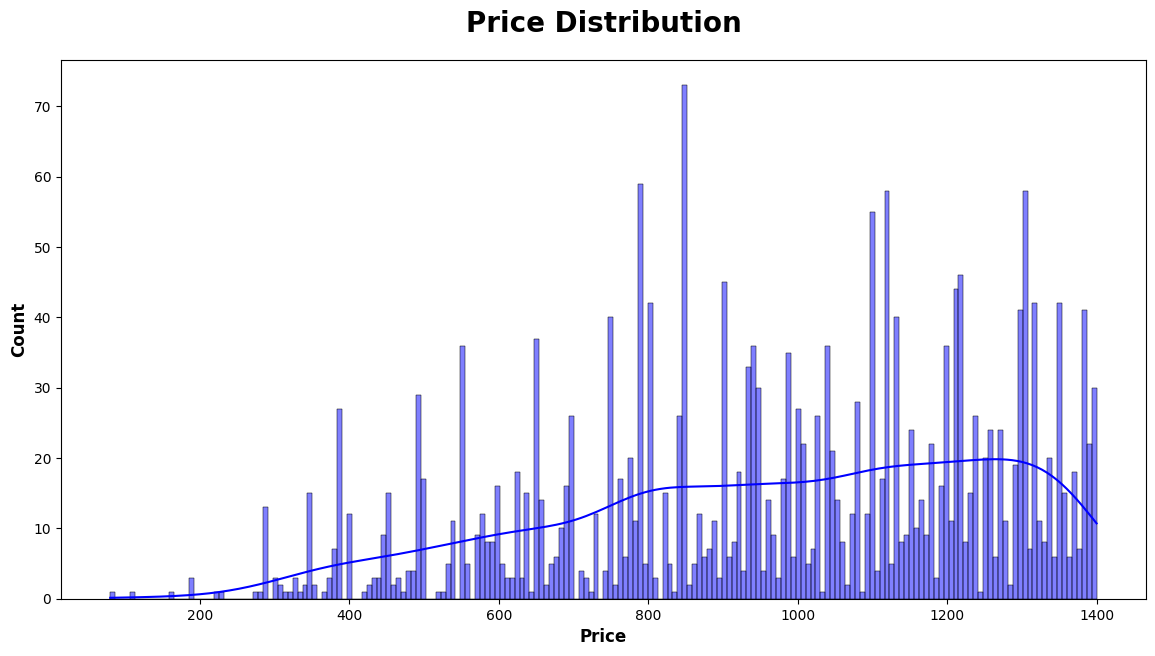

In [23]:
plt.subplots(figsize=(14,7))
sns.histplot(df.price, bins=200, kde=True, color = 'b')
plt.title("Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Price", weight="bold", fontsize=12)
plt.show()

From the chart it is clear that the Target Variable Skewed
## Most Selling car

In [24]:
df.mark.value_counts()[0:10]

,count
mark,
toyota,1047
honda,382
nissan,320
mazda,148
suzuki,126
mitsubishi,65
daihatsu,56
subaru,54
volkswagen,52


##Most Selling Used Car is Toyota

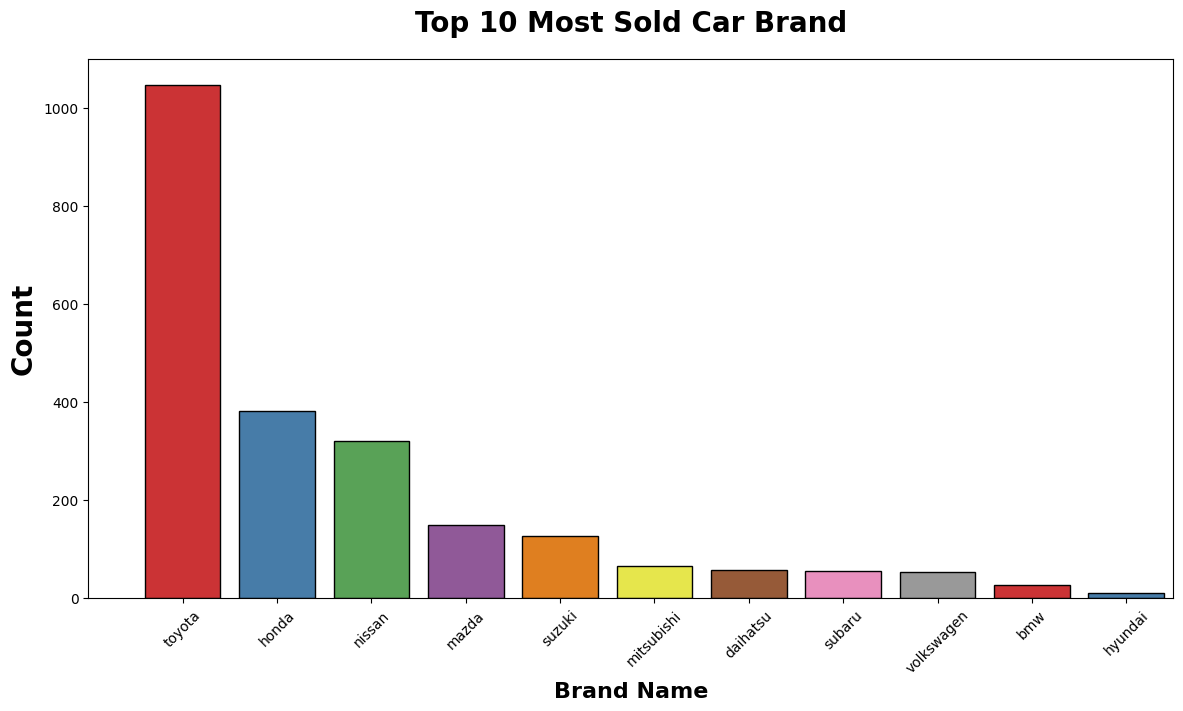

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x="mark", data=df,ec = "black",palette="Set1",order = df['mark'].value_counts().index)
plt.title("Top 10 Most Sold Car Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

##Check mean price of Toyota which is most sold

In [26]:
i20 = df[df['mark'] == 'toyota']['price'].mean()
print(f'The mean price of toyota is {i20:.2f} Rupees')

The mean price of toyota is 1024.91 Rupees


##Most selling model

In [27]:
df.model.value_counts()[0:10]

,count
model,
fit,270
vitz,179
passo,127
ist,93
ractis,85
note,71
demio,62
wish,59
swift,58


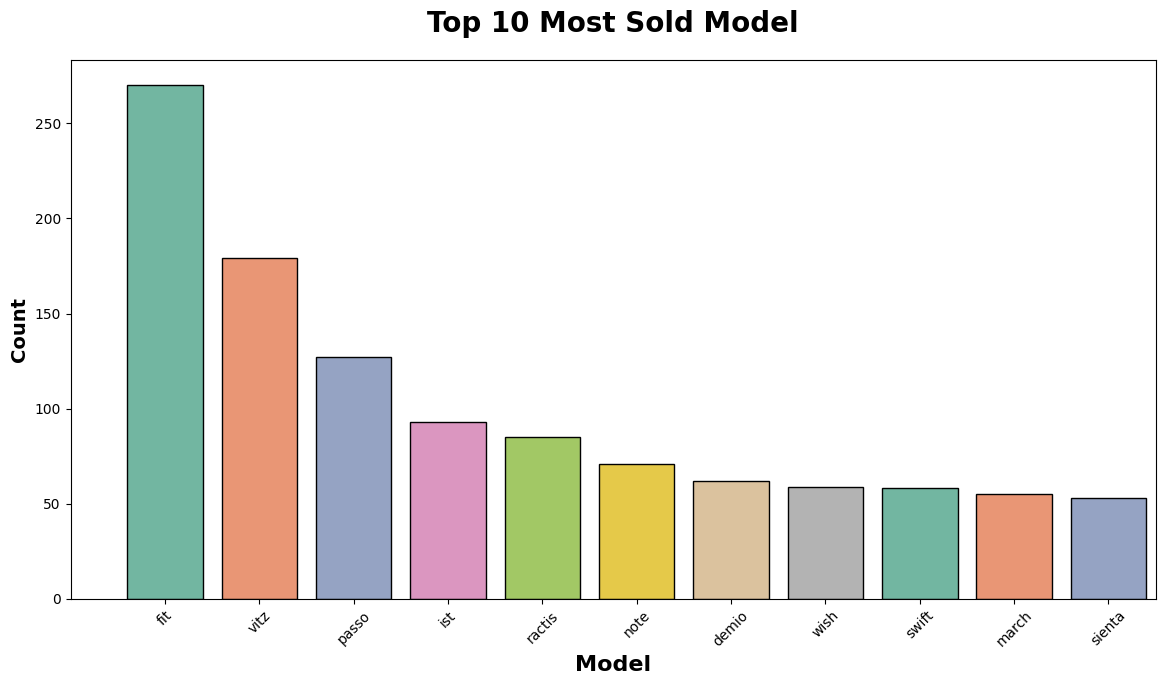

In [28]:
plt.subplots(figsize=(14,7))
sns.countplot(x="model", data=df,ec = "black",palette="Set2",order = df['model'].value_counts().index)
plt.title("Top 10 Most Sold Model", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Model", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

##Check the Mean price of Fit model which is most sold

In [29]:
fit = df[df['model'] == 'fit']['price'].mean()
print(f'The mean price of Fit is {fit:.2f} Rupees')

The mean price of Fit is 957.47 Rupees


##Costliest Brand and Costliest Model

In [30]:
mark = df.groupby('mark').price.max()
mark_df = mark.to_frame().sort_values('price',ascending=False)[0:10]
mark_df

,price
mark,
honda,1400
mitsubishi,1400
mazda,1400
subaru,1400
nissan,1400
toyota,1400
suzuki,1398
volvo,1395
bmw,1390


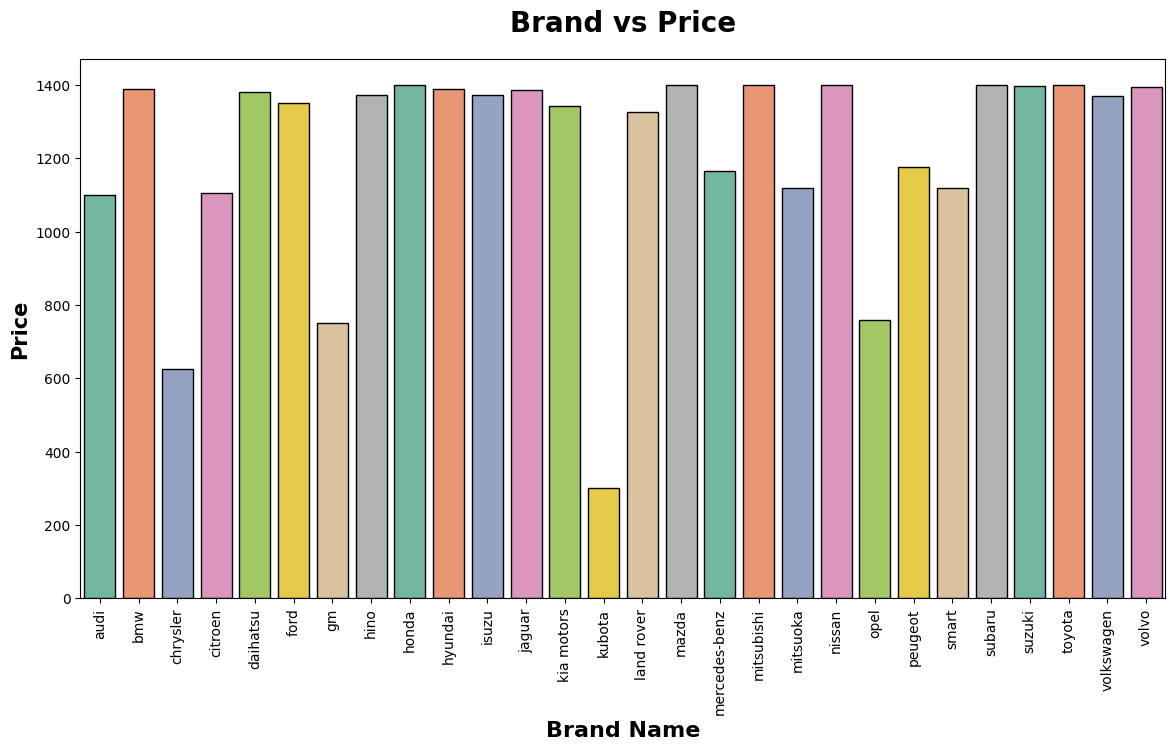

In [31]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mark.index, y=mark.values,ec = "black",palette="Set2")
plt.title("Brand vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

##Costliest Model

In [32]:
model= df.groupby('model').price.max()
model =model.to_frame().sort_values('price',ascending=False)[0:10]
model

,price
model,
isis,1400
rx-8,1400
comfort,1400
elgrand,1400
estima,1400
estima t,1400
legacy,1400
legacy b4,1400
mark x,1400


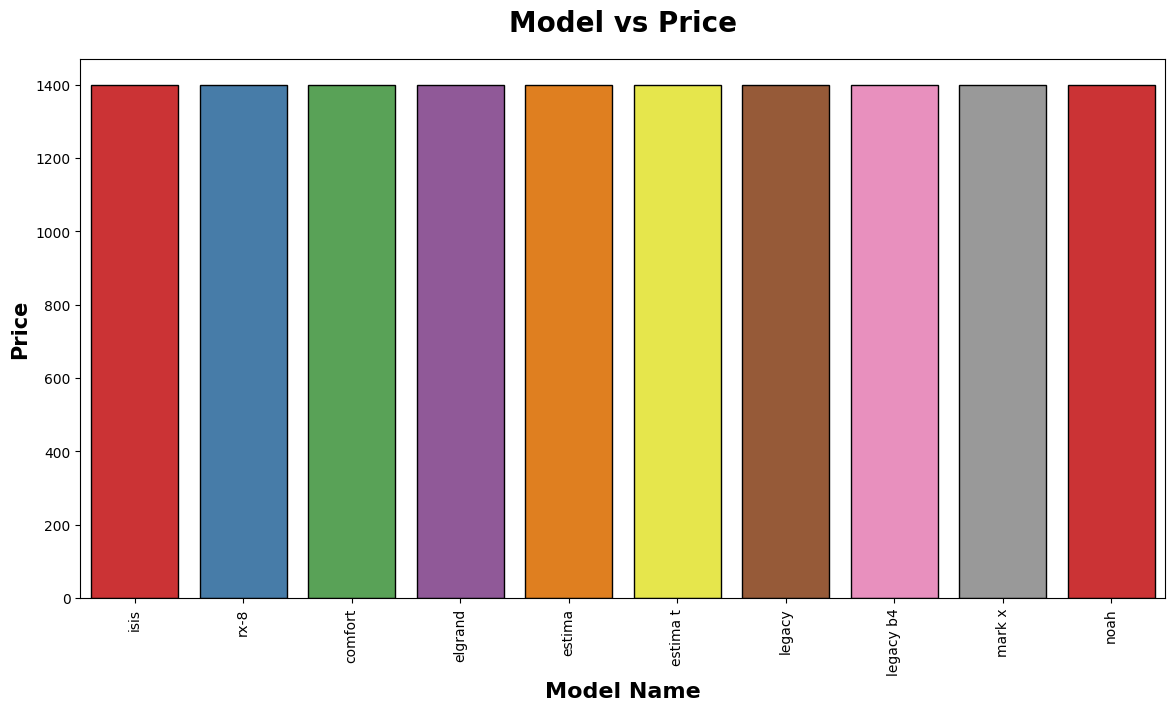

In [33]:
plt.subplots(figsize=(14,7))
sns.barplot(x=model.index, y=model.price,ec = "black",palette="Set1")
plt.title("Model vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=15)
plt.xlabel("Model Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

##Plot of Dive vs Price

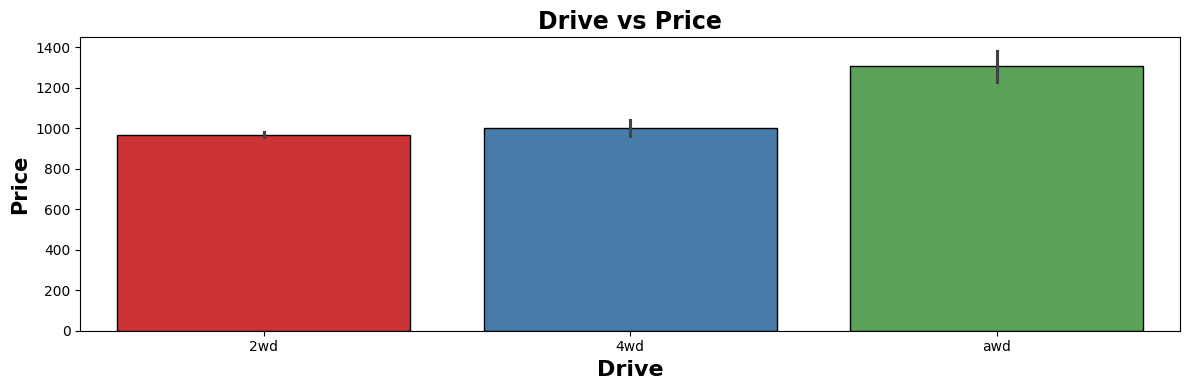

In [34]:
fig,axs=plt.subplots()
fig.set_size_inches(12,4)
sns.barplot(x='drive',y='price',data=df,ax=axs,ec = "black",palette="Set1")
plt.title('Drive vs Price', weight='bold', fontsize=17)
plt.ylabel("Price", weight="bold", fontsize=15)
plt.xlabel("Drive", weight="bold", fontsize=16)
plt.tight_layout()
plt.show()

##Plot of year with respect to price and total number of cars

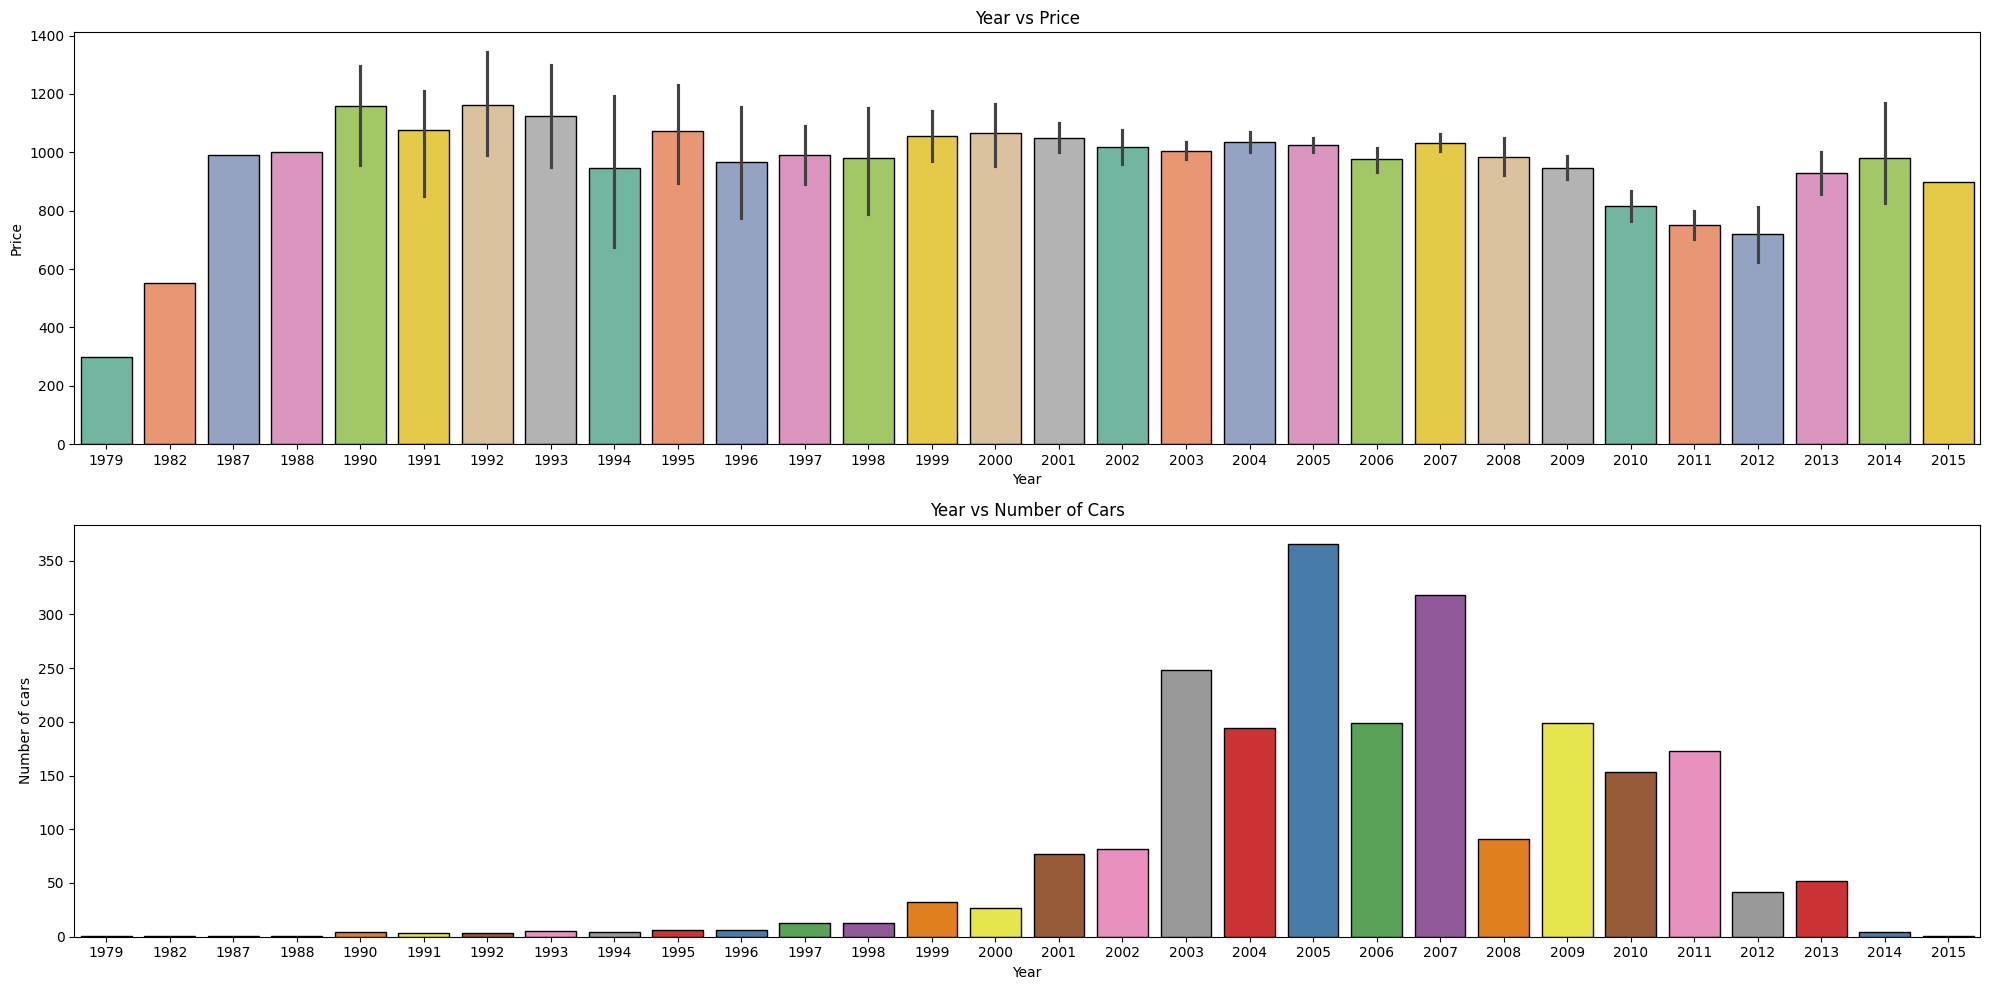

In [35]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='year',y='price',data=df,ax=axs[0],ec = "black",palette="Set2")
year_counts = df.groupby('year').count()['price'].reset_index(name='count')
sns.barplot(x='year', y='count', data=year_counts, ax=axs[1],ec = "black",palette="Set1")
axs[0].set_title('Year vs Price')
axs[0].set_ylabel('Price')
axs[0].set_xlabel('Year')
axs[1].set_title('Year vs Number of Cars')
axs[1].set_ylabel('Number of cars')
axs[1].set_xlabel('Year')
plt.tight_layout()
plt.show()

##Most Mileage and Car Brand

In [36]:
mileage= df.groupby('mark')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
mark,
hino,567058.000000
peugeot,181963.000000
isuzu,146682.333333
kia motors,127010.500000
volvo,122150.000000
smart,114945.000000
daihatsu,114801.517857
mitsuoka,110472.000000
mazda,108699.972973


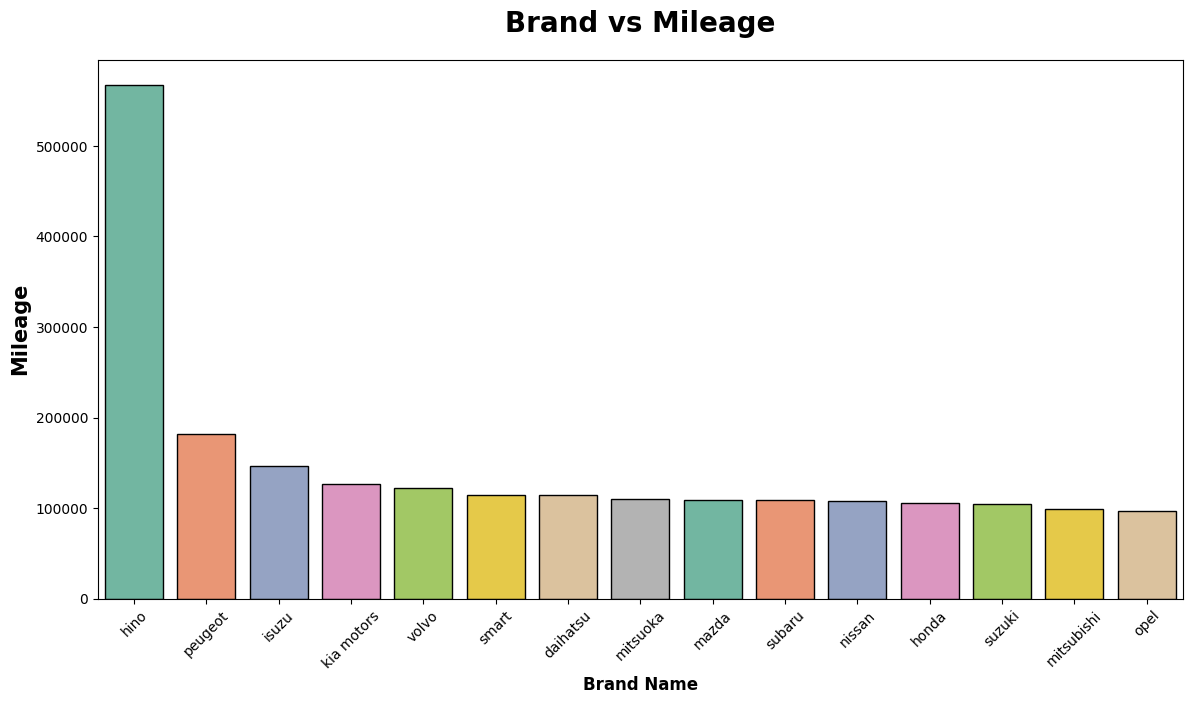

In [37]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Report

Hino gives highest mileage
Least milege is given by opel brand vehicles.
##Model with Highest Mileage

In [38]:
mileage_C= df.groupby('model')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_C.to_frame()

,mileage
model,
dutro,567058.0
comfort,497408.0
crown comfort,497408.0
307,332926.0
landy,255800.0
s-mx,240961.0
clipper,227000.0
ad expert,225216.0
wagon r rr,202000.0


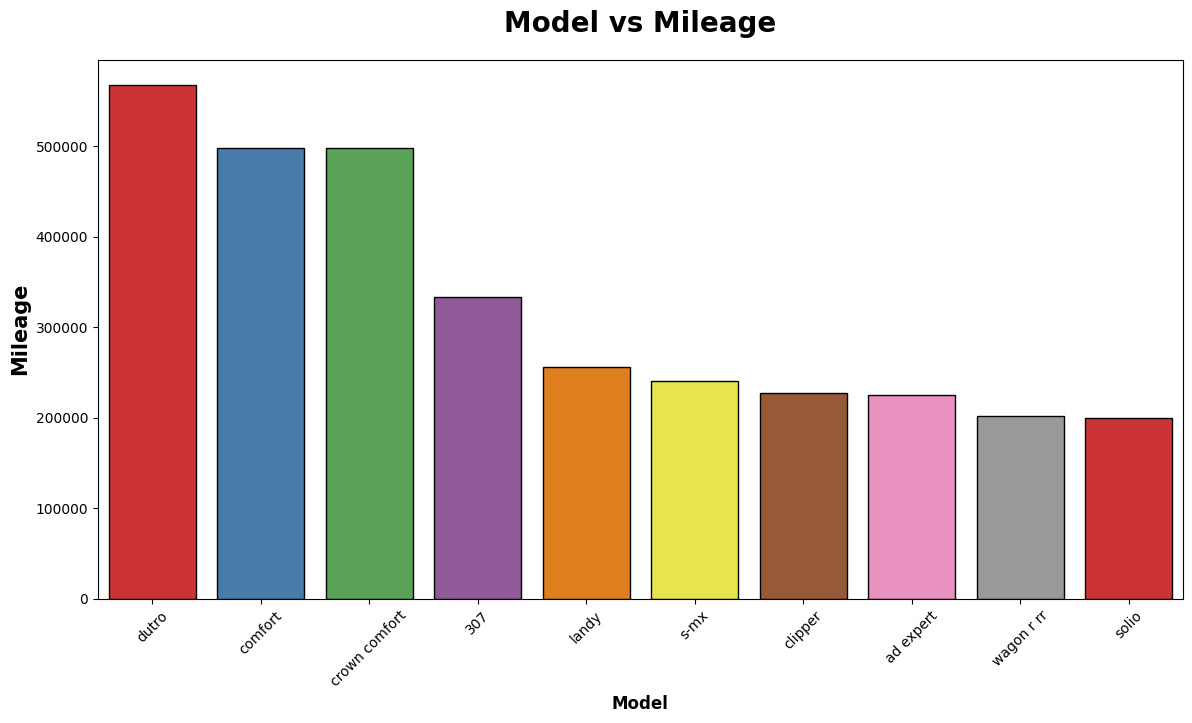

In [39]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_C.index, y=mileage_C.values, ec = "black", palette="Set1")
plt.title("Model vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=15)
plt.xlabel("Model", weight="bold", fontsize=12)
plt.xticks(rotation=45)
plt.show()

##Fuel Type vs Price

In [40]:
fuel = df.groupby('fuel')['price'].median().sort_values(ascending=False)
fuel.to_frame()

,price
fuel,
diesel,1306.0
lpg,1120.0
cng,1100.0
gasoline,1000.0
hybrid,940.0


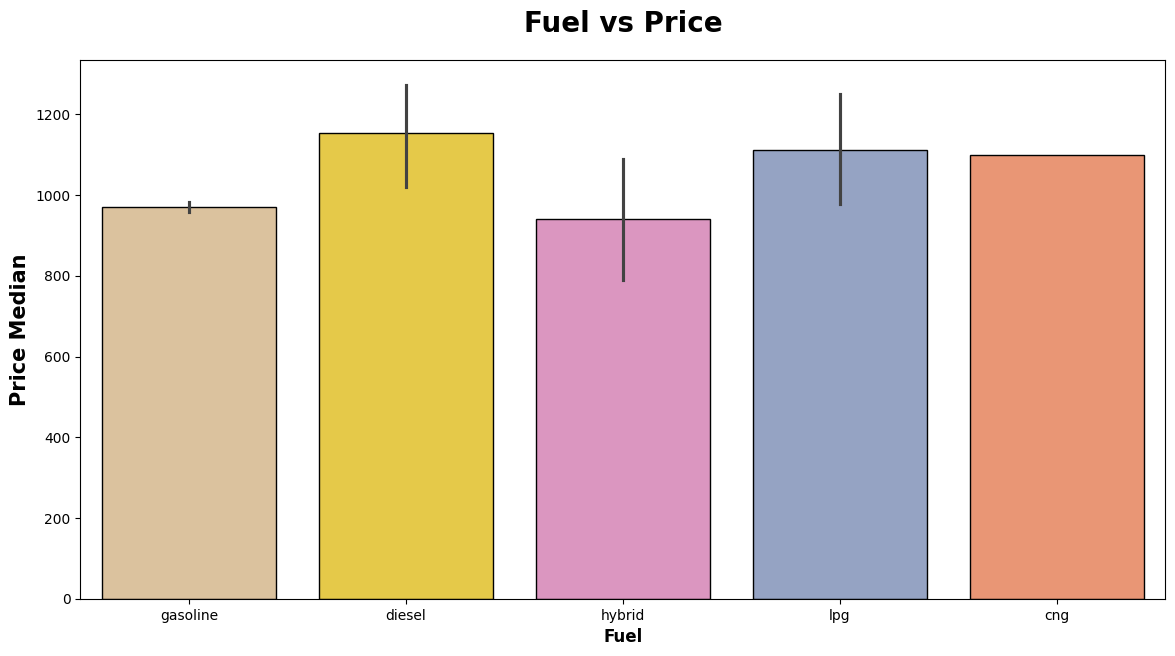

In [41]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel, y=df.price, ec = "black", palette="Set2_r")
plt.title("Fuel vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel", weight="bold", fontsize=12)
plt.show()

##Most sold Fuel type

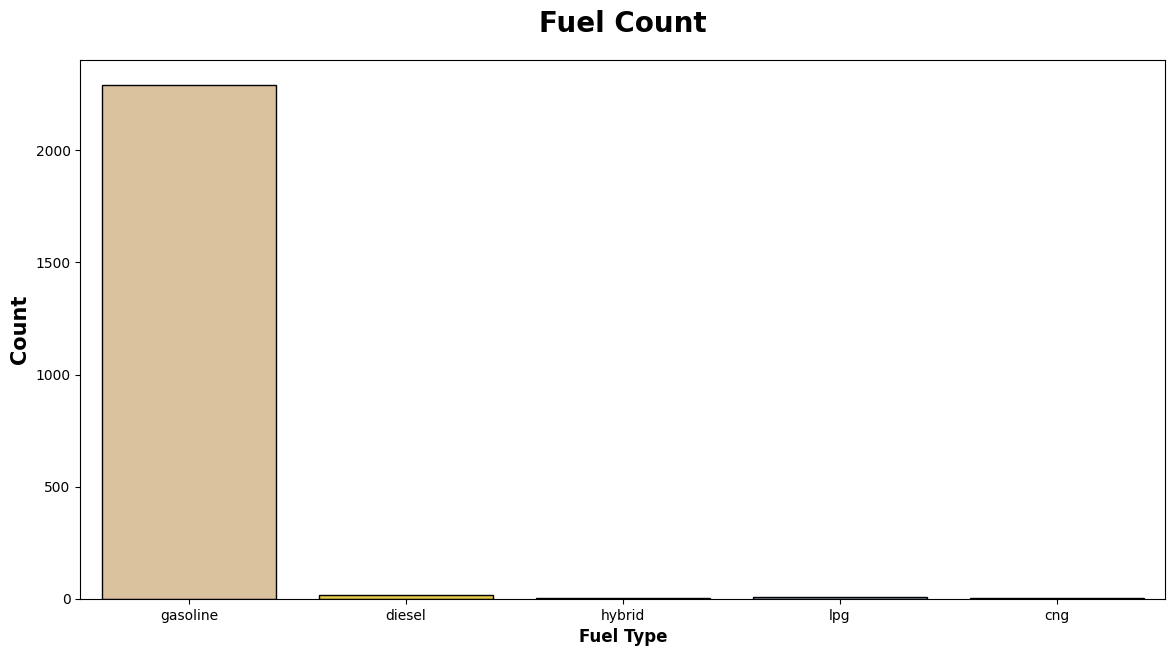

In [42]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel, ec = "black", palette="Set2_r")
plt.title("Fuel Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

##Fuel types available and mileage given

In [43]:
# Mean mileage by fuel type
fuel_mileage = df.groupby('fuel')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel,
lpg,266934.571429
diesel,150878.333333
gasoline,99119.964192
hybrid,90000.000000
cng,81516.000000


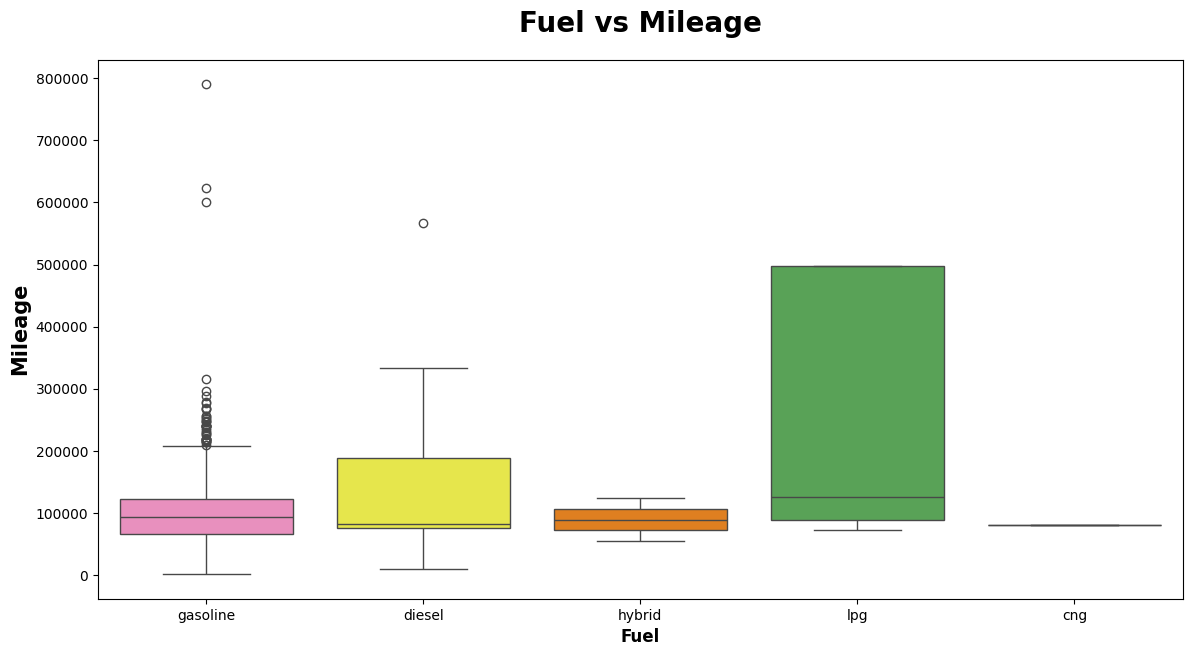

In [44]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=15)
plt.xlabel("Fuel", weight="bold", fontsize=12)
plt.show()

##Mileage vs Price

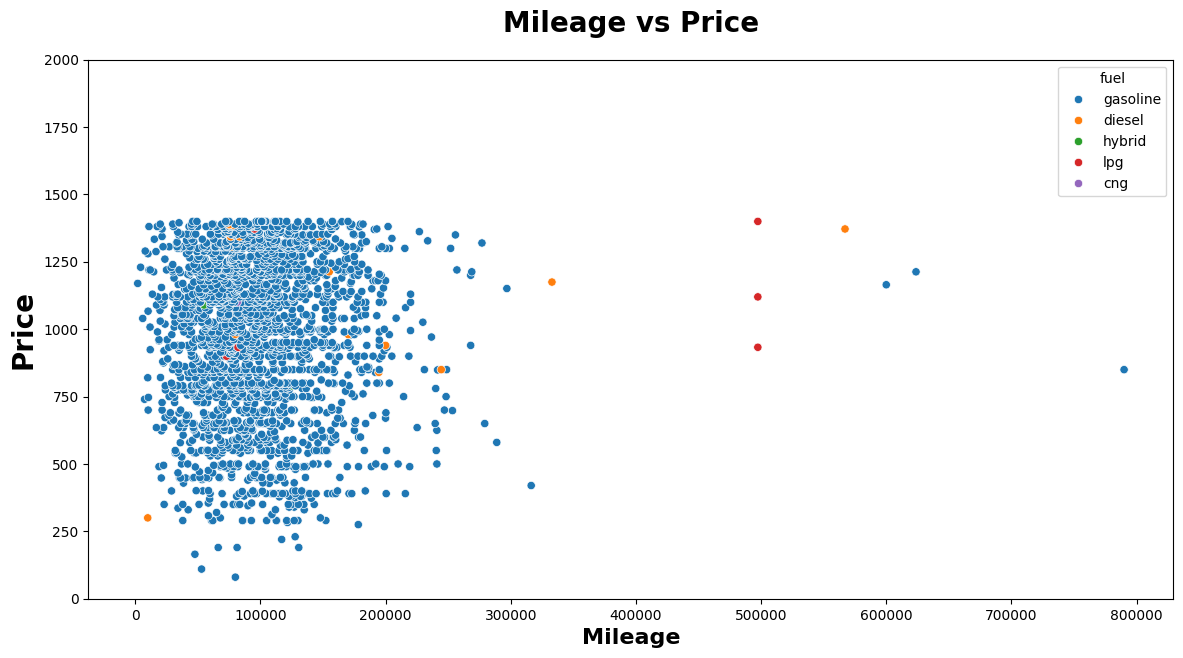

In [45]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='price', data=df,ec = "white",color='b', hue='fuel')
plt.title("Mileage vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=20)
plt.ylim(0,2000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

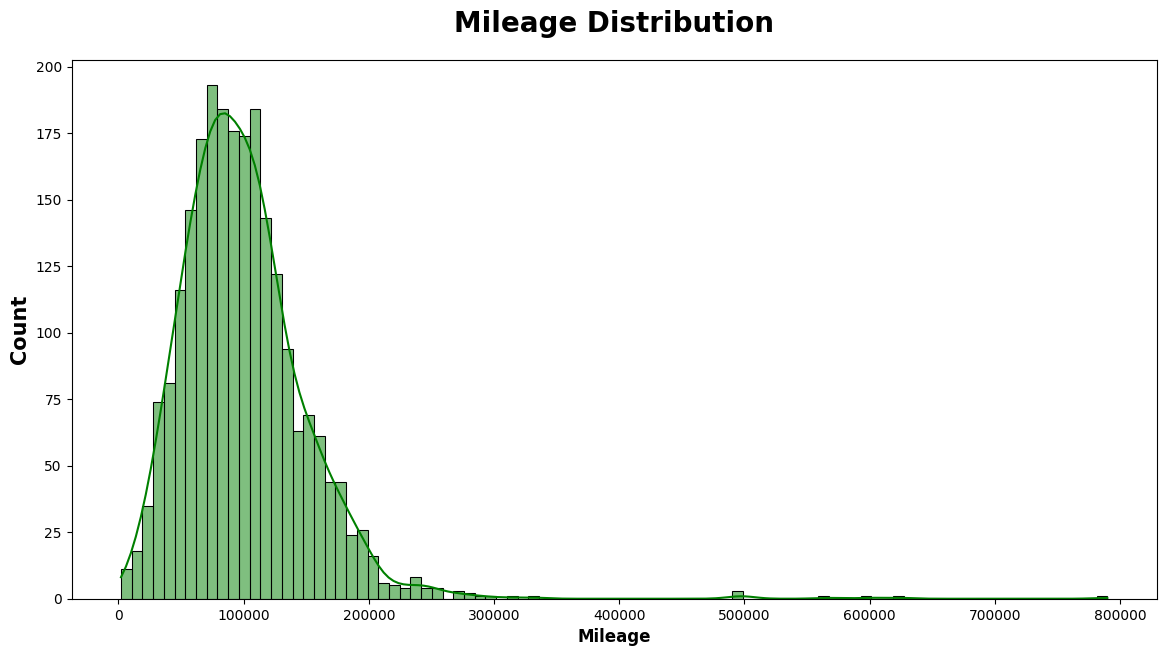

In [46]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

##Transmission Type

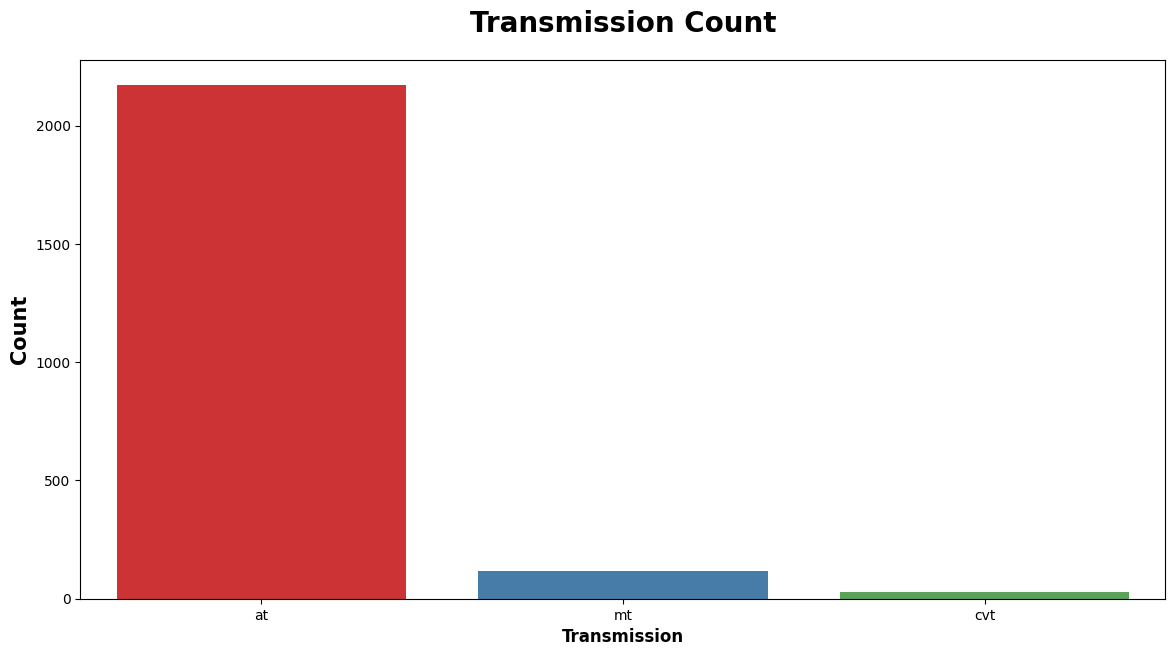

In [47]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission', data=df,palette="Set1")
plt.title("Transmission Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission", weight="bold", fontsize=12)
plt.show()

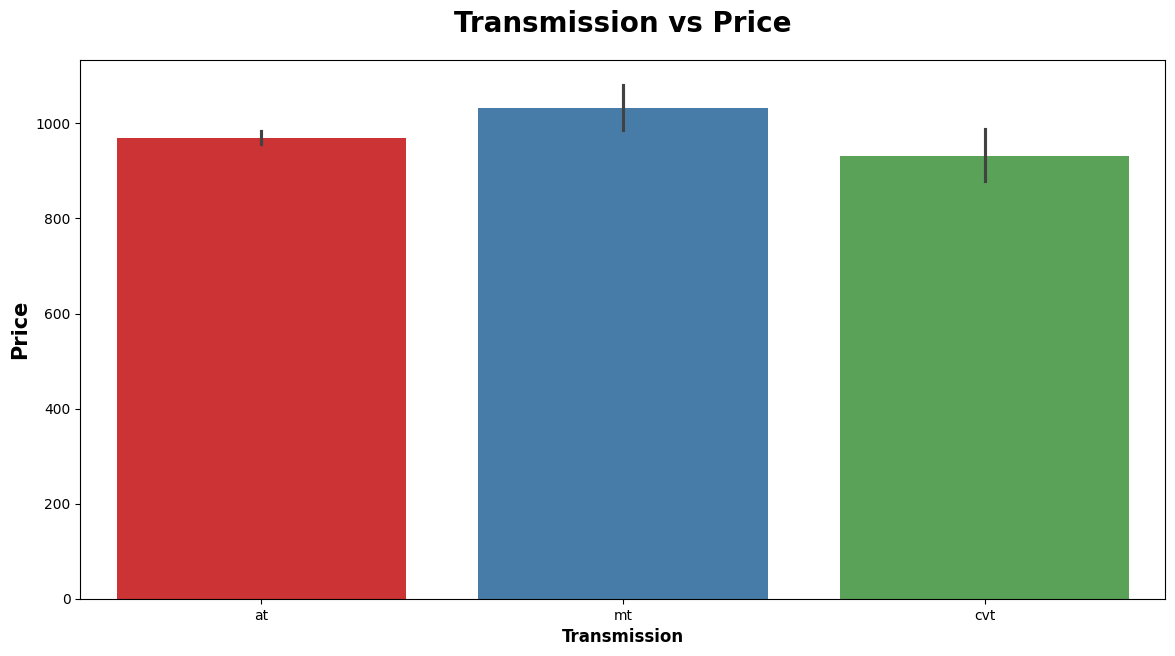

In [48]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission', y='price', data=df,palette="Set1")
plt.title("Transmission vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=15)
plt.xlabel("Transmission", weight="bold", fontsize=12)
plt.show()

##Exploratory Data Analysis (EDA)

In [49]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['year', 'mileage', 'engine_capacity', 'price']

We have 6 categorical features : ['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']


In [50]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

mark
toyota           45.168248
honda            16.479724
nissan           13.805004
mazda             6.384814
suzuki            5.435720
mitsubishi        2.804142
daihatsu          2.415876
subaru            2.329594
volkswagen        2.243313
bmw               1.164797
hyundai           0.388266
mercedes-benz     0.215703
kia motors        0.172563
isuzu             0.129422
audi              0.129422
smart             0.086281
volvo             0.086281
land rover        0.086281
peugeot           0.086281
hino              0.043141
mitsuoka          0.043141
ford              0.043141
gm                0.043141
citroen           0.043141
opel              0.043141
chrysler          0.043141
kubota            0.043141
jaguar            0.043141
Name: proportion, dtype: float64
---------------------------
model
fit                    11.647972
vitz                    7.722174
passo                   5.478861
ist                     4.012079
ractis                  3.666954
       

#Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
##Numerical Features

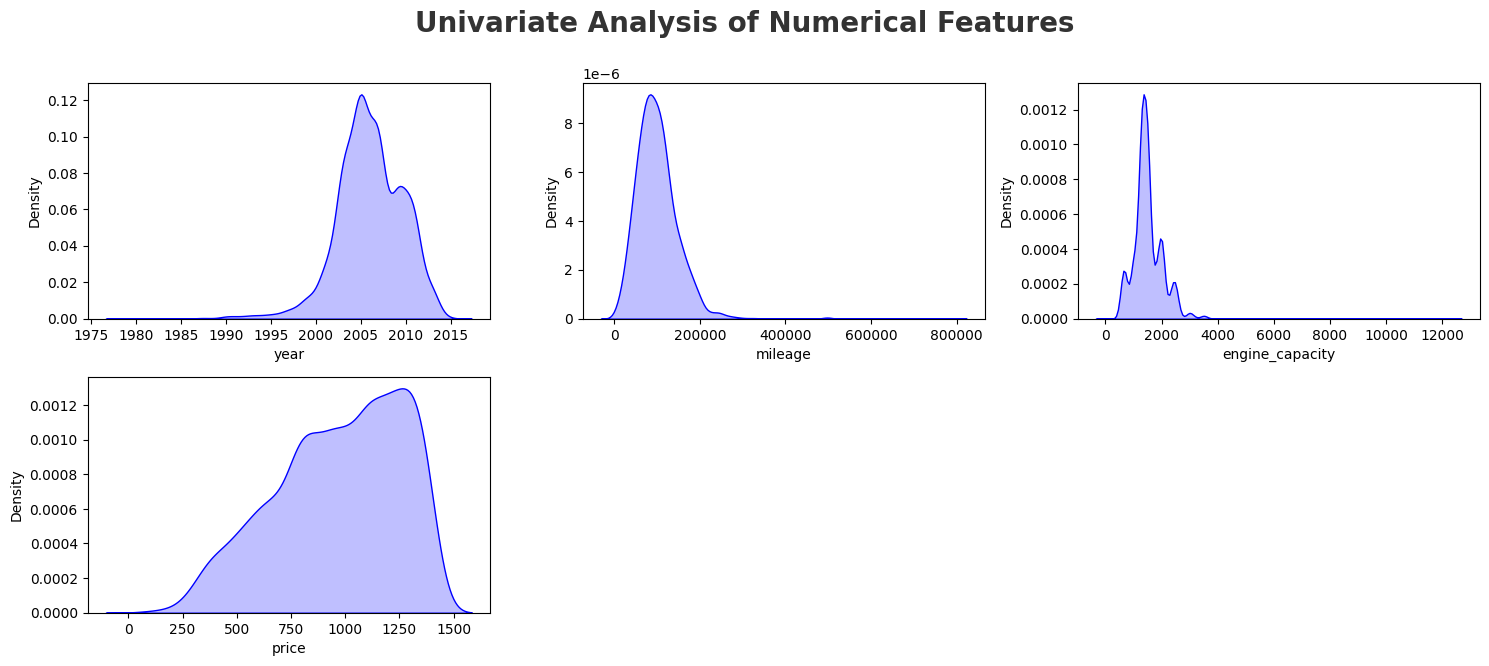

In [51]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##Categorical Features

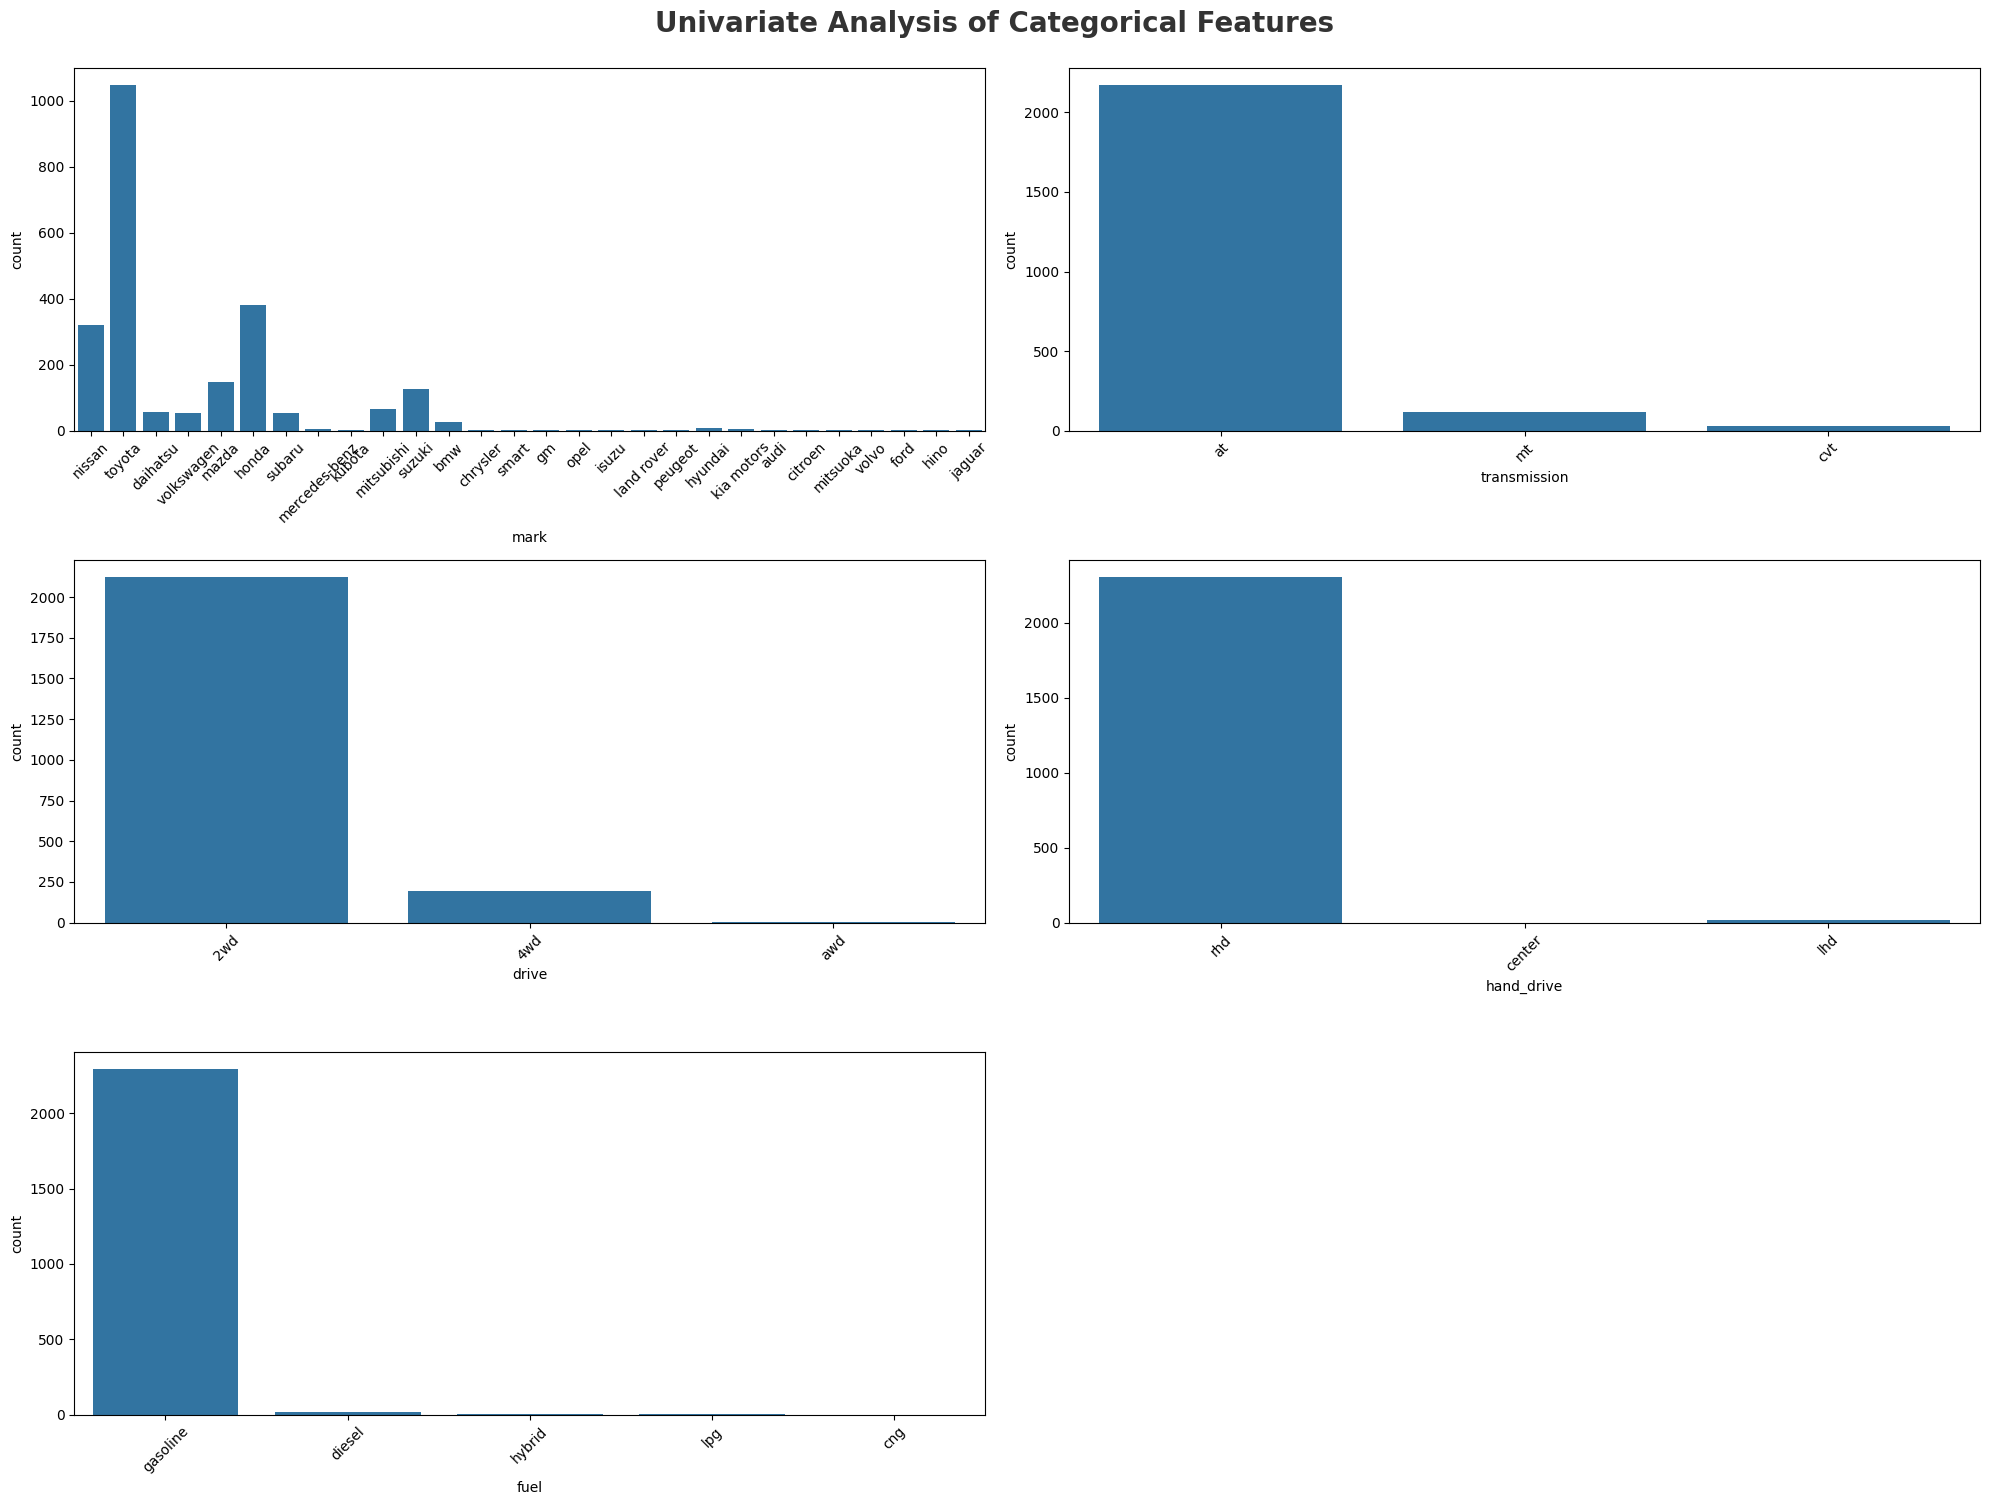

In [52]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['mark', 'transmission', 'drive', 'hand_drive', 'fuel']
for i in range(0, len(cat1)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.
##Check Multicollinearity in Numerical features

In [53]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                     year   mileage  engine_capacity     price
year             1.000000  0.086065        -0.142460 -0.211092
mileage          0.086065  1.000000         0.130362  0.021581
engine_capacity -0.142460  0.130362         1.000000  0.173748
price           -0.211092  0.021581         0.173748  1.000000


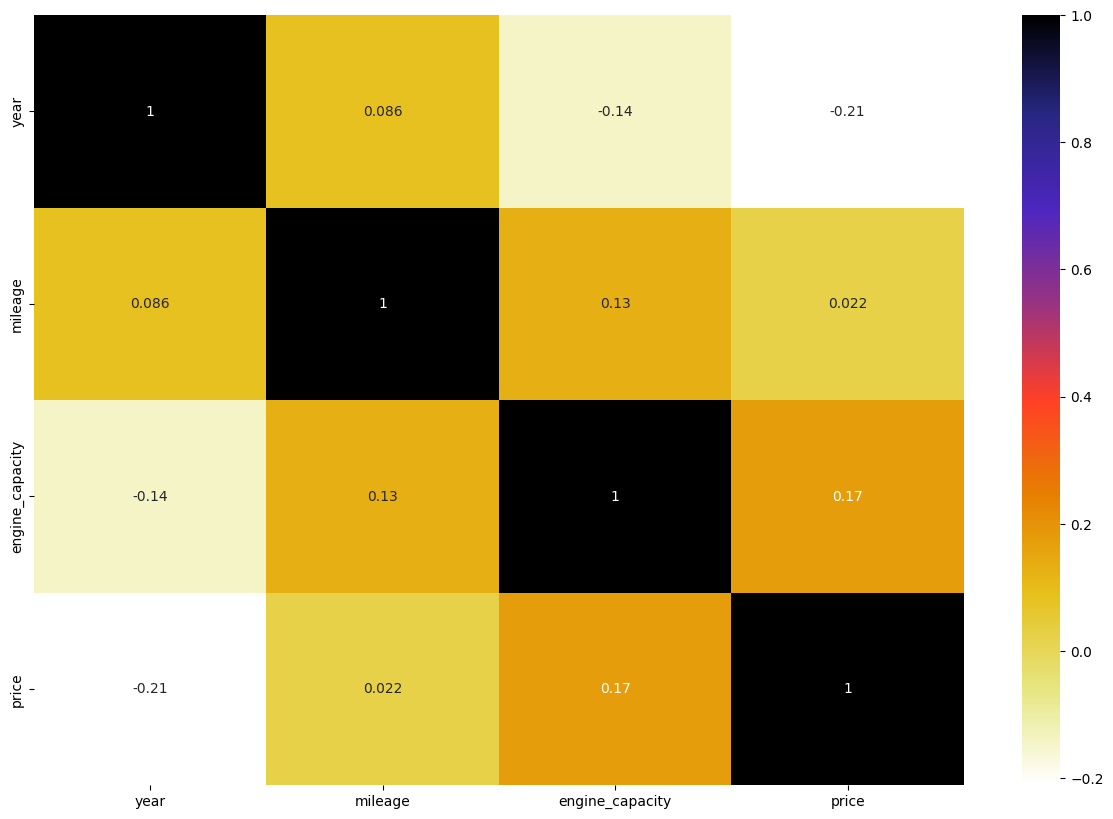

In [54]:
plt.figure(figsize = (15,10))
sns.heatmap(numeric_df.corr(), cmap="CMRmap_r", annot=True)
plt.show()

##Visualizing the mean price for every categorical column

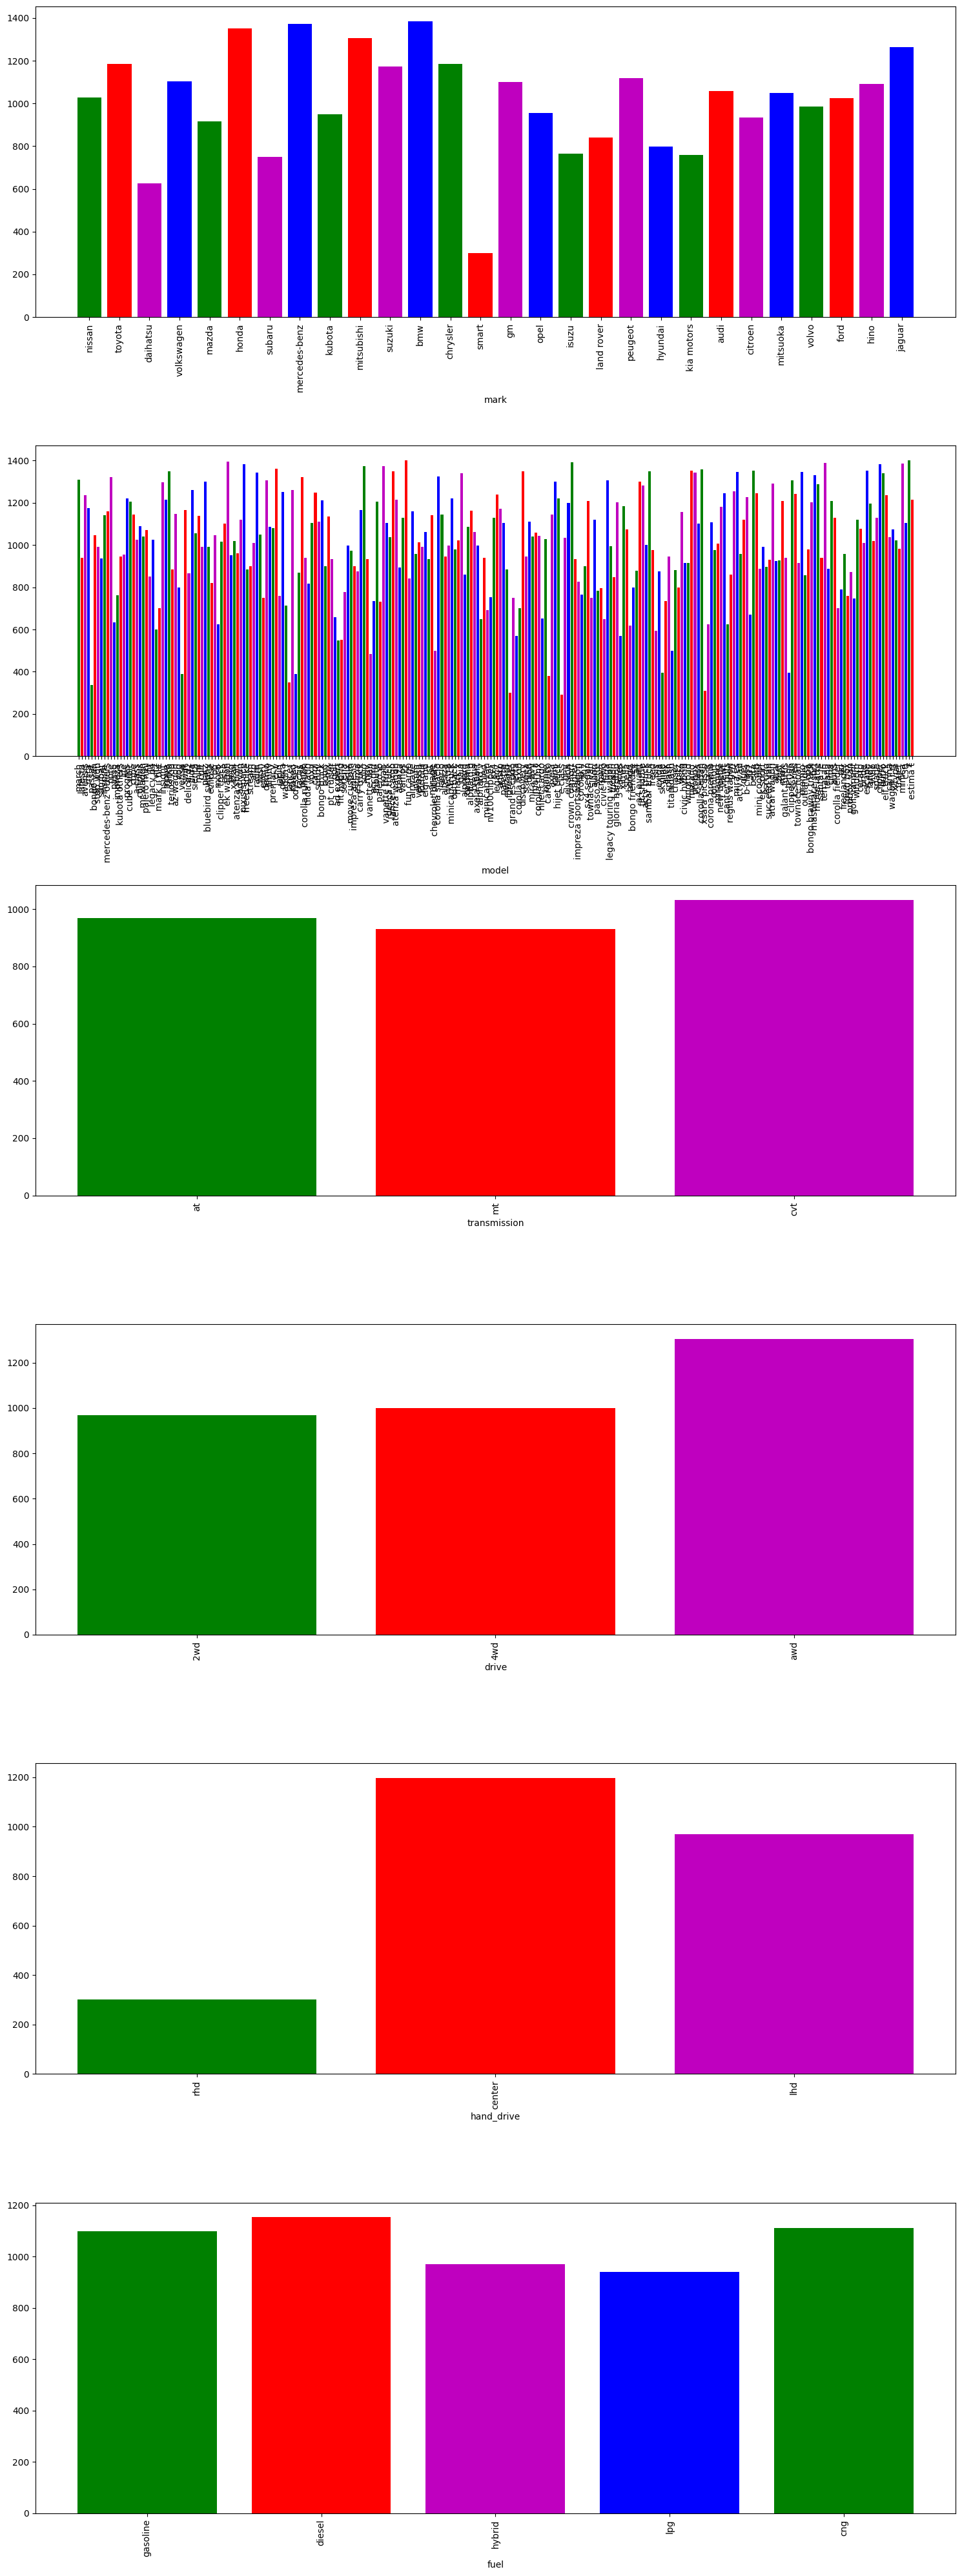

In [55]:

plt.figure(figsize=(15, 40))
colors = ['g', 'r', 'm', 'b']
for i in range(0, len(categorical_features)):
    plt.subplot(6,1,i+1)
    cat_list = df[categorical_features[i]].unique()
    cat_average = df.groupby(categorical_features[i])['price'].mean()
    plt.bar(cat_list, cat_average, color=colors)
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=90)
plt.tight_layout()

##Continuous features and Price

In [56]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=30]
print('Num of continues features :',continuous_features)

Num of continues features : ['year', 'mileage', 'engine_capacity', 'price']


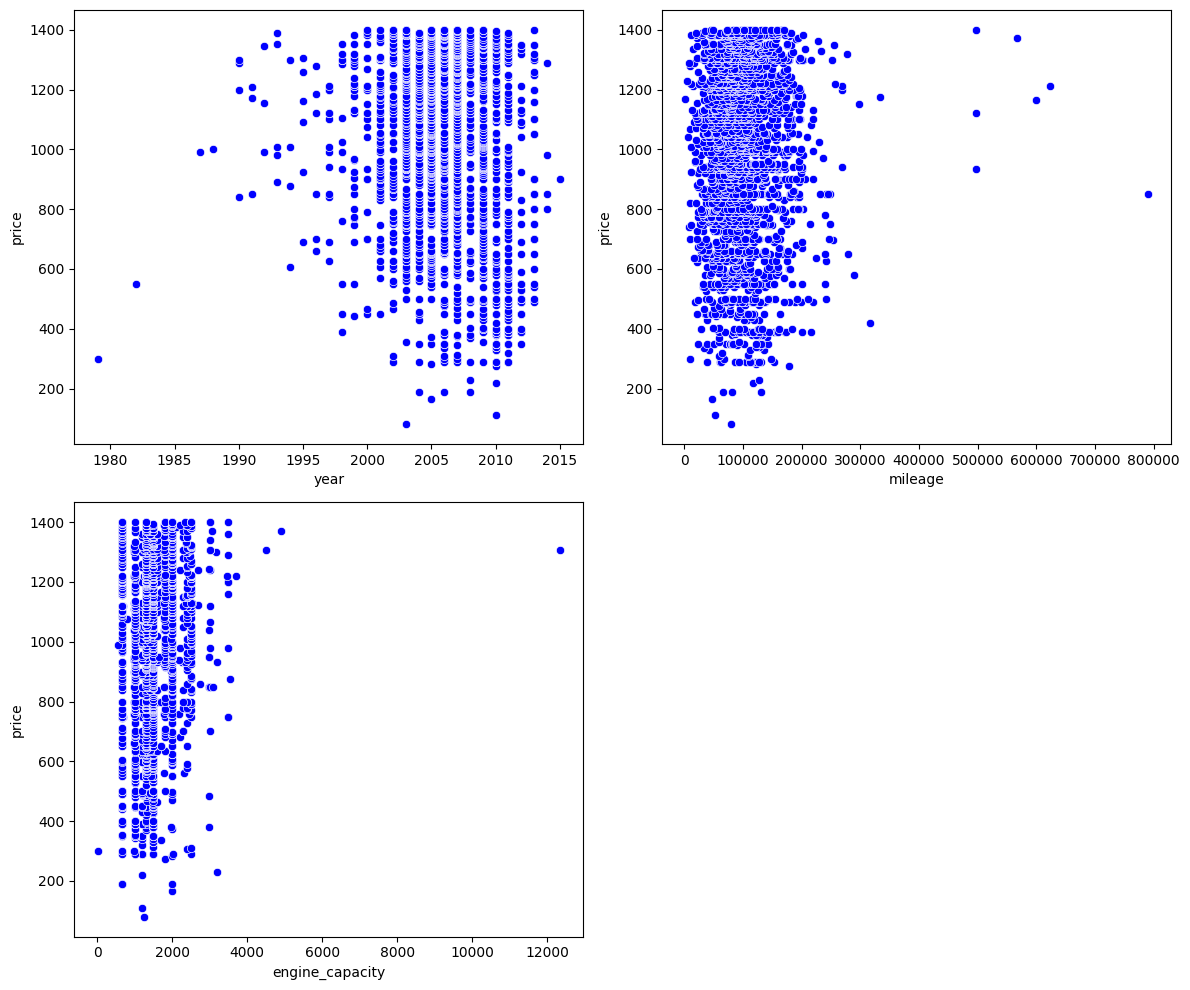

In [57]:
fig = plt.figure(figsize=(12, 10))

for i in range(0, len(continuous_features)):
    if continuous_features[i] != 'price':
        ax = plt.subplot(2, 2, i+1)
        sns.scatterplot(data= df ,y='price', x=continuous_features[i], color='b')
        plt.tight_layout()

##Type of Features
###Numeric Features

In [58]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 4


###Categorical Features

In [59]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 6


###Discrete Features

In [60]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


###Continuous Features

In [61]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 4


#Multicollinearity Check
##Correllation Heatmap

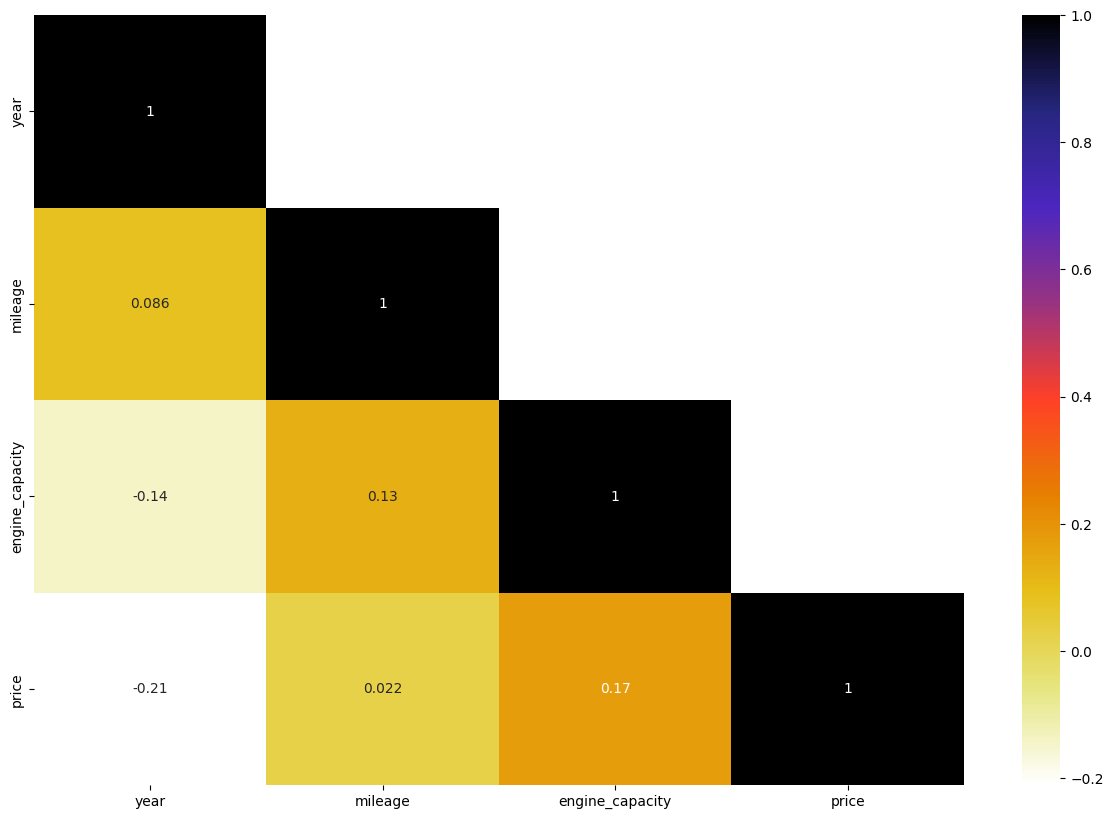

In [62]:
#Multicollinearity Check
#Correllation Heatmap
df_numeric = df.select_dtypes(include=['number'])

# Multicollinearity Check - Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), cmap="CMRmap_r", annot=True, mask=np.triu(df_numeric.corr(), k=1))
plt.show()

##Variance Inflation Factor (VIF)

In [63]:

num_features = df.select_dtypes(exclude="object").columns
for i in range(0, len(num_features)-1):
    x = df.loc[:, df.columns == num_features[i]]
    y = df.price
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            num_features[i], vif)
        )

Variance Inflation Factor of year column is 12.3 

Variance Inflation Factor of mileage column is 3.64 

Variance Inflation Factor of engine_capacity column is 6.32 



##Check Outlier and Capping it

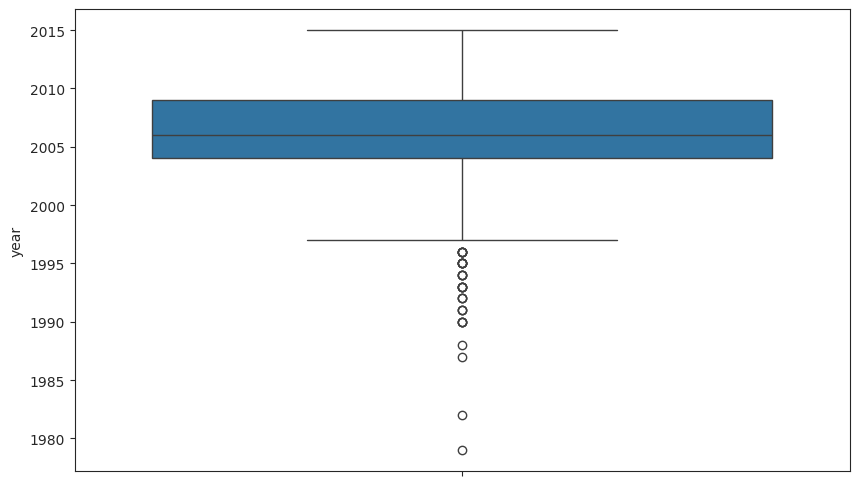

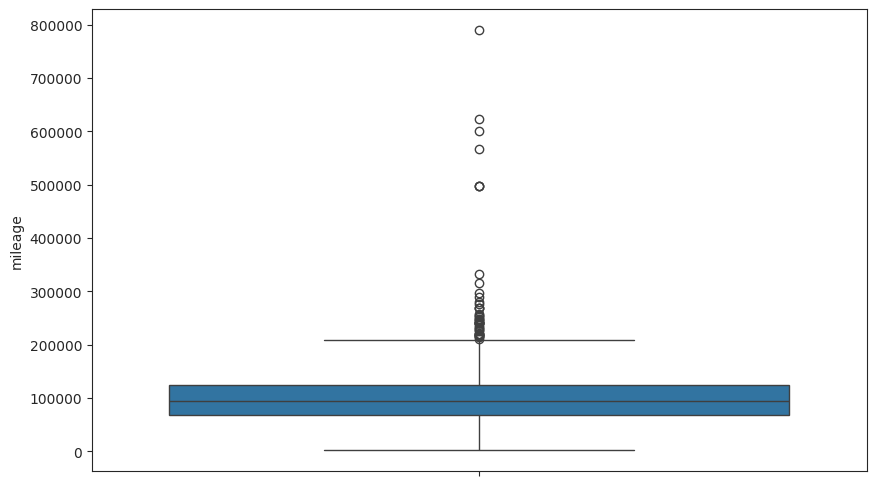

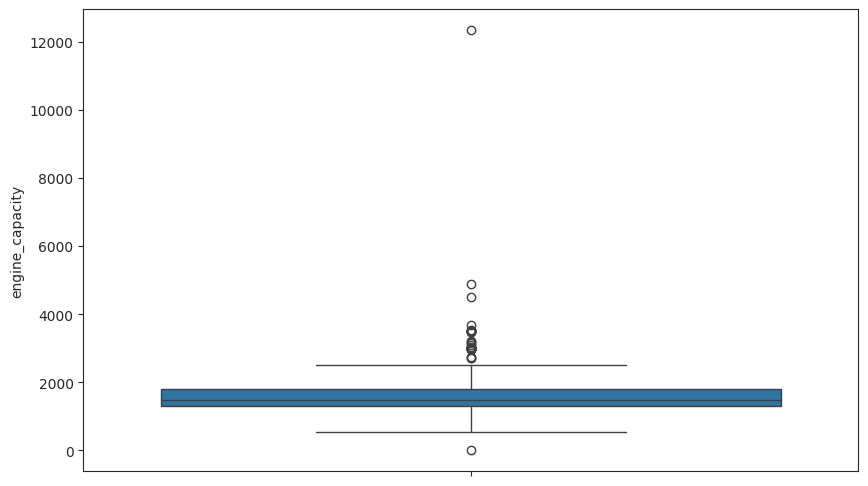

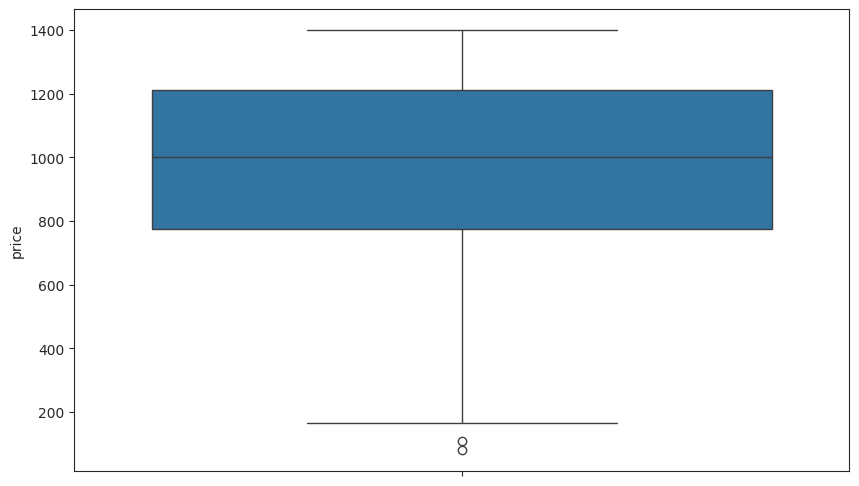

In [64]:
for i in continuous_features:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

##Detecting Outlier and Capping it

In [65]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit
    return df

In [66]:
for col in continuous_features:
         detect_outliers(col)


 #### year ####
percentile25 2004.0
percentile75 2009.0
Upper limit 2016.5
Lower limit 1996.5

 #### mileage ####
percentile25 67000.0
percentile75 124000.0
Upper limit 209500.0
Lower limit -18500.0

 #### engine_capacity ####
percentile25 1300.0
percentile75 1800.0
Upper limit 2550.0
Lower limit 550.0

 #### price ####
percentile25 776.0
percentile75 1213.0
Upper limit 1868.5
Lower limit 120.5


##Checking Skewness after Outlier Capping

In [67]:
df[continuous_features].skew(axis=0, skipna=True)

,0
year,-0.226689
mileage,0.500667
engine_capacity,0.436871
price,-0.465258


#Feature Transformation

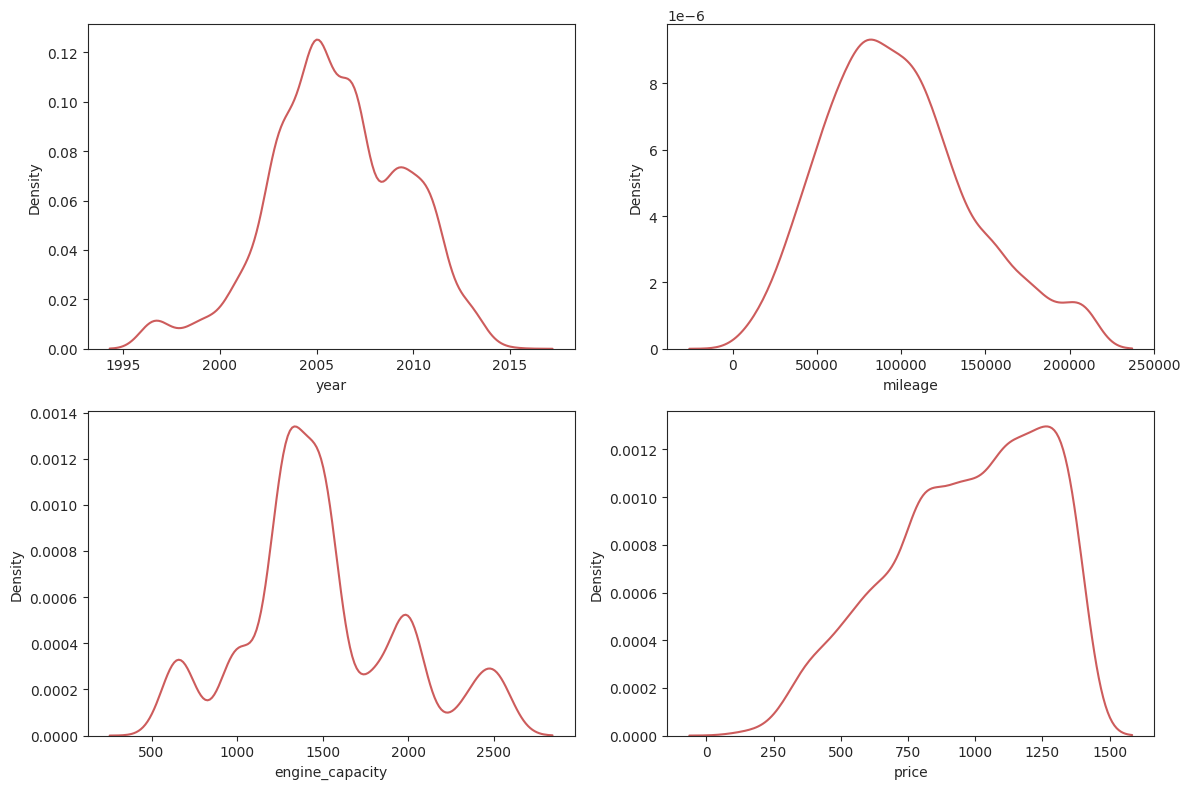

In [68]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['year', 'mileage', 'engine_capacity', 'price']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

#Split X and Y

In [69]:
X = df.drop(['price'], axis=1)
y = df['price']

###Feature Selection

In [70]:
for feature in cat_features:
    print(feature,':', X[feature].nunique())

mark : 28
model : 258
transmission : 3
drive : 3
hand_drive : 3
fuel : 5


#Feature Encoding and Scaling

In [71]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['fuel','transmission','drive','hand_drive']
binary_columns = ['model']

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
binary_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
         ("StandardScaler", numeric_transformer, num_features),
        ("BinaryEncoder", binary_transformer, binary_columns)

    ]
)

In [72]:
X= preprocessor.fit_transform(X)

#Train Test Split

In [73]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1854, 26), (464, 26))

#Model Selection
##Create a Function to Evaluate Model

In [74]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [75]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 255.0410
- Mean Absolute Error: 211.5728
- R2 Score: 0.2201
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 742375017783329.0000
- Mean Absolute Error: 34463894995573.4219
- R2 Score: -6678911370022110667735040.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 256.4421
- Mean Absolute Error: 213.2341
- R2 Score: 0.2115
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 247.6426
- Mean Absolute Error: 208.5869
- R2 Score: 0.2568


Ridge
Model performance for Training set
- Root Mean Squared Error: 254.9804
- Mean Absolute Error: 211.5531
- R2 Score: 0.2204
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 246.0779
- Mean Absolute Error: 207.4680
- R2 Score: 0.2662


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 209.243

##Results of All Models

In [76]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,2.821734e-01
2,Ridge,2.661550e-01
1,Lasso,2.567929e-01
3,K-Neighbors Regressor,1.681647e-01
4,Decision Tree,-1.925368e-01
0,Linear Regression,-6.678911e+24


##Here we can use Random Forest Regressor and K-Neighbours Regressor for Hyper Parameter Tuning

In [77]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {"max_depth": [5, 8, 15, 12, 10],
             "max_features": [5, 7, 17, 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [78]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)
                   ]

In [79]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 20}
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 8, 'max_features': 8, 'max_depth': 15}


##Retraining the Model with best Parameters

In [80]:
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(**model_param['KNN'], n_jobs=-1)
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 164.7464
- Mean Absolute Error: 132.9859
- R2 Score: 0.6746
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 234.7252
- Mean Absolute Error: 190.7350
- R2 Score: 0.3323


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 243.1590
- Mean Absolute Error: 197.5313
- R2 Score: 0.2910
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 248.0599
- Mean Absolute Error: 204.4489
- R2 Score: 0.2543




##Results of Retrained Models

In [81]:
pd.DataFrame(list(zip(model_list, r2_list*100)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Random Forest Regressor,0.332305
1,K-Neighbors Regressor,0.254286


In [85]:
rf_reg = RandomForestRegressor(**model_param['RF'], n_jobs=-1)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

##Saving model in Pickle Format

In [86]:
#saving trained machine learning model
pickle.dump(rf_reg,open('Yuva_file','wb'))

##Loading the saved model

In [87]:
lin_model=pickle.load(open('Yuva_file','rb'))

In [88]:
lin_model

RandomForestRegressor(max_depth=15, max_features=8, min_samples_split=8,
                      n_estimators=1000, n_jobs=-1)

In [92]:
lin_model.predict(X_test[67].reshape(1,-1))

array([1000.0433783])